# Mitochondria in different compartments - Figure 3

In [169]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from scipy.stats import ranksums

%matplotlib inline

In [170]:
timepoint = [5, 23, 27, 50, 69.5]
bound = [15, 25, 35, 47, 62]
stage_cmap = sns.color_palette("deep",8)
type_cmap = [(253/255, 225/255, 245/255),
             (1, 183/255, 139/255),
             (167/255, 217/255, 245/255)]
cmap_cell = sns.color_palette("Paired")

## Load data

In [10]:
cell_df = pd.read_csv("neuron_list_hobert.csv")
cell_df.head()

,name,id,type,class,neurotransmitter1,neurotransmitter2,l1_vol,l2_vol,l3_vol,adult_vol,dauer_vol
0,ADAL,1,2,ADA,Glutamate,NaN,0.701728,1.273221,1.371940,3.494185,1.159168
1,ADAR,2,2,ADA,Glutamate,NaN,0.644497,1.260319,1.613807,2.878003,1.017088
2,ADEL,3,1,ADE,Dopamine,NaN,0.364170,1.336320,1.832287,7.324293,0.791347
3,ADER,4,1,ADE,Dopamine,NaN,0.297124,1.328579,1.841921,6.864507,0.781312
4,ADFL,5,1,ADF,Acetylcholine,Serotonin,0.753066,1.446728,2.018413,3.728548,1.827789


In [11]:
l1_mito_df = pd.read_csv("240527_dataset2_mito_neuron.csv")
l2_mito_df = pd.read_csv("240527_dataset5_mito_neuron.csv")
l3_mito_df = pd.read_csv("240527_dataset6_mito_neuron.csv")
adult_mito_df = pd.read_csv("240527_dataset8_mito_neuron.csv")
dauer_mito_df = pd.read_csv("240527_dauer1_mito_neuron.csv")
dauer_mito_df.head()

,cell_name,cell_id,cell_common_id,class,mito_id,cell_vol,mito_vol,cell_surf,mito_surf,x_pos,y_pos,z_pos,mito_len,dist_pre,dist_post
0,AIBR,15,14,2,747,2.679757,0.021658,29.616532,0.372357,5.868936,2.328813,4.282388,1.328166,0.619359,0.666193
1,AIBR,15,14,2,977,2.679757,0.022989,29.616532,0.438184,7.818976,3.981256,5.437973,0.960554,0.472862,0.581278
2,AIBR,15,14,2,1346,2.679757,0.008806,29.616532,0.194831,4.602977,2.567442,7.082849,0.874920,2.611763,0.339316
3,AIBR,15,14,2,1400,2.679757,0.020378,29.616532,0.411419,7.925869,5.646151,7.352387,1.726368,0.232002,0.817458
4,AIBR,15,14,2,2008,2.679757,0.010291,29.616532,0.250027,6.260060,7.735721,10.437065,1.414361,0.206209,0.813789


In [12]:
l1_syn_df = pd.read_csv("240527_dataset2_synapse.csv")
l2_syn_df = pd.read_csv("240527_dataset5_synapse.csv")
l3_syn_df = pd.read_csv("240527_dataset6_synapse.csv")
adult_syn_df = pd.read_csv("240527_dataset8_synapse.csv")
dauer_syn_df = pd.read_csv("240527_dauer1_synapse.csv")
dauer_syn_df.head()

,syn_id,pre,pre_id,pre_common_id,post,post_id,post_common_id,x_pos,y_pos,z_pos,size
0,1,RIH,145,124,CEPDL,187,71,6264,3540,50,56629.85685
1,1,RIH,145,124,OLQDL,189,95,6264,3540,50,115370.14310
2,2,RIH,145,124,URXR,179,181,3312,3848,50,529157.36040
3,2,RIH,145,124,IL2DR,182,88,3312,3848,50,153855.83760
4,2,RIH,145,124,CEPDR,186,72,3312,3848,50,17786.80203


## Synapse distribution

In [13]:
def find_synapse(syn_df, pre, post):
    
    pre_name_list = np.array(syn_df["pre"])
    pre_id_list = np.array(syn_df["pre_id"])
    post_name_list = np.array(syn_df["post"])
    post_id_list = np.array(syn_df["post_id"])
    
    if isinstance(pre, str):
        if pre=="":
            pre_valid = np.ones(syn_df.shape[0], dtype="bool")
        else:
            npre = pre_name_list.shape[0]
            pre_valid = np.zeros(npre, dtype="bool")

            for i in range(npre):
                if pre_name_list[i][:len(pre)]==pre:
                    pre_valid[i] = True
    
    else:
        pre_valid = np.isin(pre_id_list, pre)
            
    if isinstance(post, str):
        if post=="":
            post_valid = np.ones(syn_df.shape[0], dtype="bool")
        else:
            npost = post_name_list.shape[0]
            post_valid = np.zeros(npost, dtype="bool")

            for i in range(npost):
                if post_name_list[i][:len(post)]==post:
                    post_valid[i] = True
                
    else:
        post_valid = np.isin(post_id_list, post)
        
    
    return syn_df[pre_valid*post_valid]

In [14]:
pre_syn_df = find_synapse(adult_syn_df, "SMDD", "")
post_syn_df = find_synapse(adult_syn_df, "", "SMDD")

syn_out_smdd = pre_syn_df[["x_pos","y_pos","z_pos"]].values
syn_out_smdd = np.unique(syn_out_smdd, axis=0)/1000
# syn_out_smdd = syn_out_smdd[syn_out_smdd[:,2]<8, :] # Neglecting non-nerve ring

syn_in_smdd = post_syn_df[["x_pos","y_pos","z_pos"]].values
syn_in_smdd = np.unique(syn_in_smdd, axis=0)/1000

In [15]:
pre_syn_df = find_synapse(adult_syn_df, "SMDV", "")
post_syn_df = find_synapse(adult_syn_df, "", "SMDV")

syn_out_smdv = pre_syn_df[["x_pos","y_pos","z_pos"]].values
syn_out_smdv = np.unique(syn_out_smdv, axis=0)/1000

syn_in_smdv = post_syn_df[["x_pos","y_pos","z_pos"]].values
syn_in_smdv = np.unique(syn_in_smdv, axis=0)/1000

In [22]:
binw = 0.5
bins = np.arange(3, 20, binw)
bin_centers = bins[:-1] + binw/2
bin_centers = np.array([0]+list(bin_centers))

hsmdd_out, _, _ = plt.hist(syn_out_smdd[:,0], bins=bins, density=True)
plt.close()
hsmdd_out = np.array([0] + list(hsmdd_out))

hsmdv_out, _, _ = plt.hist(syn_out_smdv[:,0], bins=bins, density=True)
plt.close()
hsmdv_out = np.array([0] + list(hsmdv_out))

hsmdd_in, _, _ = plt.hist(syn_in_smdd[:,0], bins=bins, density=True)
plt.close()
hsmdd_in = np.array([0] + list(hsmdd_in))

hsmdv_in, _, _ = plt.hist(syn_in_smdv[:,0], bins=bins, density=True)
plt.close()
hsmdv_in = np.array([0] + list(hsmdv_in))

/home/jabae/miniconda3/envs/cmito/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [146]:
pre_syn_df = find_synapse(adult_syn_df, "RMDD", "")
post_syn_df = find_synapse(adult_syn_df, "", "RMDD")

syn_out_rmdd = pre_syn_df[["x_pos","y_pos","z_pos"]].values
syn_out_rmdd = np.unique(syn_out_rmdd, axis=0)/1000

syn_in_rmdd = post_syn_df[["x_pos","y_pos","z_pos"]].values
syn_in_rmdd = np.unique(syn_in_rmdd, axis=0)/1000

In [147]:
pre_syn_df = find_synapse(adult_syn_df, "RMDV", "")
post_syn_df = find_synapse(adult_syn_df, "", "RMDV")

syn_out_rmdv = pre_syn_df[["x_pos","y_pos","z_pos"]].values
syn_out_rmdv = np.unique(syn_out_rmdv, axis=0)/1000

syn_in_rmdv = post_syn_df[["x_pos","y_pos","z_pos"]].values
syn_in_rmdv = np.unique(syn_in_rmdv, axis=0)/1000

## Mitochondria length

In [159]:
smdd_dmito_len = np.load("smdd_dmito_len_top25.npy")
smdd_vmito_len = np.load("smdd_vmito_len_top25.npy")
smdv_dmito_len = np.load("smdv_dmito_len_top25.npy")
smdv_vmito_len = np.load("smdv_vmito_len_top25.npy")

smd_mito_len = [smdd_dmito_len/1000, smdd_vmito_len/1000, smdv_vmito_len/1000]

In [172]:
rmdd_dmito_len = np.load("rmdd_dmito_len_top25.npy")
rmdd_vmito_len = np.load("rmdd_vmito_len_top25.npy")
rmdv_dmito_len = np.load("rmdv_dmito_len_top25.npy")
rmdv_vmito_len = np.load("rmdv_vmito_len_top25.npy")

rmd_mito_len = [rmdd_dmito_len/1000, rmdd_vmito_len/1000, rmdv_vmito_len/1000]

## Figure

In [173]:
def plot1(ax):
    
    xticks = np.arange(32.5, 48, 2.5)
    xticklab = ["","35","","40","","45",""]
    yticks = np.arange(15, 32, 5)
    yticklab = ["15","20","25","30"]
    
    ax.plot(syn_in_smdd[:,0], syn_in_smdd[:,1], ".",
            color=cmap_cell[5], markeredgewidth=0, alpha=0.3)
    ax.plot(syn_in_smdv[:,0], syn_in_smdv[:,1], ".",
            color=cmap_cell[3], markeredgewidth=0, alpha=0.3)
    ax.plot(syn_out_smdd[:,0], syn_out_smdd[:,1], "^",
            color=cmap_cell[5], markeredgewidth=0, alpha=0.7, label="SMDD")
    ax.plot(syn_out_smdv[:,0], syn_out_smdv[:,1], "^",
            color=cmap_cell[3], markeredgewidth=0, alpha=0.7, label="SMDV")
    
    ax.set_xlim(32, 48)
    ax.set_ylim(13, 32)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=11, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=11, fontname="Arial")
    ax.set_xlabel("Position ($\mu$m)",
                   fontsize=12, fontname="Arial")
    ax.set_ylabel("Position ($\mu$m)\nD-V",
                   fontsize=12, fontname="Arial")
    plt.gca().invert_yaxis()
    ax.legend(loc="upper right", prop={"family": "Arial", "size": 10})
    
def plot2(ax):
    
    xticks = np.arange(3)
    xticklab = ["SMDD\ndorsal", "SMDD\nventral", "SMDV\nventral"]
    yticks = np.arange(1,4)
    yticklab = ["1","2","3"]
    
    sns.boxplot(data=smd_mito_len, whis=[5,95], showfliers=False,
                palette=[cmap_cell[5],cmap_cell[5],cmap_cell[3]],
                boxprops={"alpha": 0.7}, width=0.6)
    sns.stripplot(data=smd_mito_len, color="k", size=3, alpha=0.6,
                  linewidth=0)
    
    ax.set_ylim(0.4,3.3)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=11, fontname="Arial")
    ax.set_ylabel("Mitochondria\nlength ($\mu$m)", fontsize=12, fontname="Arial")

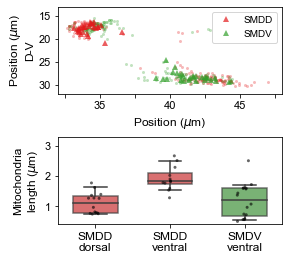

SMDD dorsal-SMDD ventral : p = 0.00011451344802160654
SMDD ventral-SMDV ventral : p =0.0011553964012761492


In [185]:
fig = plt.figure(figsize=(3.9,3.5), constrained_layout=True)
gs = fig.add_gridspec(2,1, hspace=0.01)

ax1 = fig.add_subplot(gs[0,0])
plot1(ax1)

ax2 = fig.add_subplot(gs[1,0])
plot2(ax2)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig3_1.svg")
plt.show()

r, p1 = ranksums(smd_mito_len[0], smd_mito_len[1])
r, p2 = ranksums(smd_mito_len[1], smd_mito_len[2])

print(f"SMDD dorsal-SMDD ventral : p = {p1}\nSMDD ventral-SMDV ventral : p ={p2}")

## Part 2

In [183]:
def plot3(ax):
    
    xticks = np.arange(32.5, 48, 2.5)
    xticklab = ["","35","","40","","45",""]
    yticks = np.arange(15, 32, 5)
    yticklab = ["15","20","25","30"]
    
    ax.plot(syn_in_rmdd[:,0], syn_in_rmdd[:,1], ".",
            color=cmap_cell[5], markeredgewidth=0, alpha=0.3)
    ax.plot(syn_in_rmdv[:,0], syn_in_rmdv[:,1], ".",
            color=cmap_cell[3], markeredgewidth=0, alpha=0.3)
    ax.plot(syn_out_rmdd[:,0], syn_out_rmdd[:,1], "^",
            color=cmap_cell[5], markeredgewidth=0, alpha=0.7, label="RMDD")
    ax.plot(syn_out_rmdv[:,0], syn_out_rmdv[:,1], "^",
            color=cmap_cell[3], markeredgewidth=0, alpha=0.7, label="RMDV")
    
    ax.set_xlim(31, 48)
    ax.set_ylim(13, 32)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=11, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=11, fontname="Arial")
    ax.set_xlabel("Position ($\mu$m)",
                   fontsize=12, fontname="Arial")
    ax.set_ylabel("Position ($\mu$m)\nD-V",
                   fontsize=12, fontname="Arial")
    plt.gca().invert_yaxis()
    ax.legend(loc="upper right", prop={"family": "Arial", "size": 10})
    
def plot4(ax):
    
    xticks = np.arange(3)
    xticklab = ["RMDD\ndorsal", "RMDD\nventral", "RMDV\nventral"]
    yticks = np.arange(2.5,7.6,2.5)
    yticklab = ["2.5","5.0","7.5"]
    
    sns.boxplot(data=rmd_mito_len, whis=[5,95], showfliers=False,
                palette=[cmap_cell[5],cmap_cell[5],cmap_cell[3]],
                boxprops={"alpha": 0.7}, width=0.6)
    sns.stripplot(data=rmd_mito_len, color="k", size=3, alpha=0.6,
                  linewidth=0)
    
    ax.set_ylim(1,8.7)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xticklab, fontsize=12, fontname="Arial")
    ax.set_yticklabels(yticklab, fontsize=11, fontname="Arial")
    ax.set_ylabel("Mitochondria\nlength ($\mu$m)", fontsize=12, fontname="Arial")

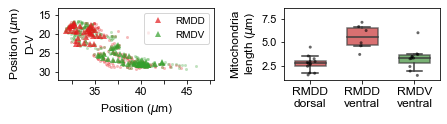

RMDD dorsal-RMDD ventral : p = 0.0008597039655991135
RMDD ventral-RMDV ventral : p =0.003561336619913126


In [186]:
fig = plt.figure(figsize=(6.1,1.6), constrained_layout=True)
gs = fig.add_gridspec(1,2, wspace=0.07)

ax1 = fig.add_subplot(gs[0,0])
plot3(ax1)

ax2 = fig.add_subplot(gs[0,1])
plot4(ax2)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig3_2.svg")
plt.show()

r, p1 = ranksums(rmd_mito_len[0], rmd_mito_len[1])
r, p2 = ranksums(rmd_mito_len[1], rmd_mito_len[2])

print(f"RMDD dorsal-RMDD ventral : p = {p1}\nRMDD ventral-RMDV ventral : p ={p2}")